In [1]:

import sys
import os
import glob
sys.path.append("../NEAT")
from NEATModels import NEATDynamic, nets
from NEATModels.config import dynamic_config
from NEATUtils import helpers
from NEATUtils.helpers import load_json
from stardist.models import StarDist2D
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
from pathlib import Path

Using TensorFlow backend.


In [6]:
imagedir = '/home/sancere/Kepler/FinalONEATTraining/NEATTest/'
model_dir = '/home/sancere/Kepler/FinalONEATTraining/EverydayneatmodelV2/'
savedir= '/home/sancere/Kepler/FinalONEATTraining/NEATTest/Save/'
model_name = 'divisionm4d38V2'
star_model_name = 'bin2stardist'
division_categories_json = model_dir + 'DivisionCategories.json'
catconfig = load_json(division_categories_json)
division_cord_json = model_dir + 'DivisionCord.json'
cordconfig = load_json(division_cord_json)
model = NEATDynamic(None, model_dir , model_name,catconfig, cordconfig)
starmodel = StarDist2D(config = None, name = star_model_name, basedir = model_dir)
Path(savedir).mkdir(exist_ok=True)
n_tiles = (1,1)
event_threshold = 0.99
iou_threshold = 0.6
yolo_v2 = True

Loading network weights from 'weights_last.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.65, nms_thresh=0.075.


<Figure size 432x288 with 0 Axes>

# In the code block below compute the markers and make a dictionary for ach image

In [3]:
Raw_path = os.path.join(imagedir, '*tif')
X = glob.glob(Raw_path)
marker_dict = {}
for imagename in X:
     markers, markers_tree, density_location =  model.markers(imagename, starmodel, n_tiles = n_tiles)
     
     marker_dict[imagename] = [markers, markers_tree, density_location]
     

  0%|          | 0/20 [00:00<?, ?it/s]

Obtaining Markers



 55%|█████▌    | 11/20 [00:00<00:00, 102.43it/s]

Creating Dictionary of marker location for fast search


 25%|██▌       | 5/20 [00:00<00:00, 44.93it/s]

Computing density of each marker


100%|██████████| 20/20 [00:00<00:00, 41.19it/s]


# In the cell below use the computed dictionary and apply division model detection

In [4]:
for imagename in X:
     
     markers, markers_tree, density_location = marker_dict[imagename]
     model.predict(imagename,markers, markers_tree, density_location, savedir, n_tiles = n_tiles, event_threshold = event_threshold, iou_threshold = iou_threshold)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


  0%|          | 0/20 [00:00<?, ?it/s]

Detecting event locations


100%|██████████| 20/20 [00:50<00:00,  2.53s/it]


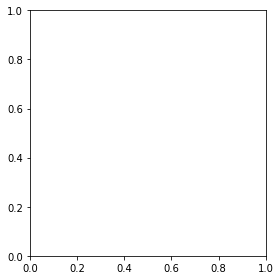

In [7]:

model.showNapari(imagedir, savedir, yolo_v2)
